<a href="https://colab.research.google.com/github/MukeshMishraReloaded/projects/blob/main/Telco_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn in the telecom industry:

Churn, the phenomenon where customers cease their subscriptions or stop doing business with a company, indeed represents one of the most significant challenges in the telecom industry. High churn rates can have profound implications, including lost revenue, increased marketing and acquisition costs, and potentially diminished brand reputation. Here's why churn is particularly impactful in the telecom sector and some strategies companies employ to address it:

In [1243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 25)
df = pd.read_csv('telco_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1244]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1245]:
#Check for whitespaces and empty strings and replace them with NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [1246]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [1247]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1248]:
bin = df[['gender', 'Partner', 'Dependents','PhoneService', 'PaperlessBilling']]

In [1249]:
bin.head(2)

,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,Female,Yes,No,No,Yes
1,Male,No,No,Yes,No


In [1250]:
df['gender'].replace({'Male':1, 'Female':0}, inplace = True)
for i in ['Partner', 'Dependents','PhoneService', 'PaperlessBilling']:
  df[i].replace({'Yes':1, 'No':0}, inplace = True)

In [1251]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [1252]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [1253]:
# Get a statistical summary of the numerical features
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000


In [1254]:
# For categorical data:
df.describe(include=['O'])

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7032,7043
unique,7043,3,3,3,3,3,3,3,3,3,4,6530,2
top,7590-VHVEG,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,20.2,No
freq,1,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365,11,5174


In [1255]:
#Check for percentage of NAN values.
100*((df['TotalCharges'].isna().sum())/df.shape[0])

0.1561834445548772

In [1256]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [1257]:
df = df.dropna(subset=['TotalCharges'])
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [1258]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [1259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [1260]:
!pip install category_encoders
from category_encoders import TargetEncoder

In [1261]:
df.drop(columns = 'customerID', inplace = True)

In [1262]:
cat = df.select_dtypes(include = ['object'])
cat.drop(columns = 'Churn', inplace = True)

In [1263]:
cat.head(5)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check


In [1264]:
df['Churn'].replace({'No':0, 'Yes':1}, inplace = True)

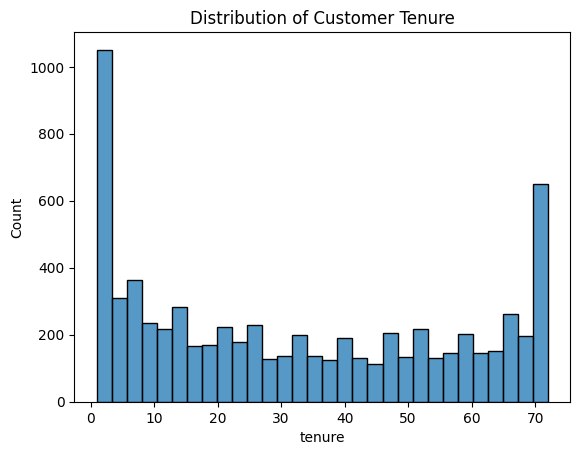

In [1265]:
#Distribution of customer tenure
sns.histplot(df['tenure'], bins=30)
plt.title('Distribution of Customer Tenure')
plt.show()

In [1266]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


#Interpretations  

1) Tenure and Churn: The correlation coefficient between tenure and Churn is -0.354049, indicating a moderate negative relationship. This suggests that customers with longer tenure are less likely to churn, which is intuitive as longer-term customers might be more satisfied or have more reasons to stay with the service.

2) MonthlyCharges and Churn: The correlation between MonthlyCharges and Churn is 0.192858, showing a weak positive relationship. This indicates that higher monthly charges might slightly increase the likelihood of churn, possibly due to customers seeking more affordable alternatives.

3) TotalCharges and Churn: The correlation coefficient is -0.199484, indicating a weak negative relationship. This suggests that customers who have spent more over time (potentially long-term customers) are slightly less likely to churn, aligning with the negative correlation observed with tenure.

4) SeniorCitizen and Churn: The correlation coefficient is 0.150541, showing a weak positive relationship. This suggests that senior citizens are slightly more likely to churn compared to non-senior citizens.

5) PaperlessBilling and Churn: The correlation coefficient is 0.191454, indicating a weak positive relationship. This could suggest that customers who opt for paperless billing are slightly more likely to churn, which might be correlated with those customers being more comfortable with switching services online.

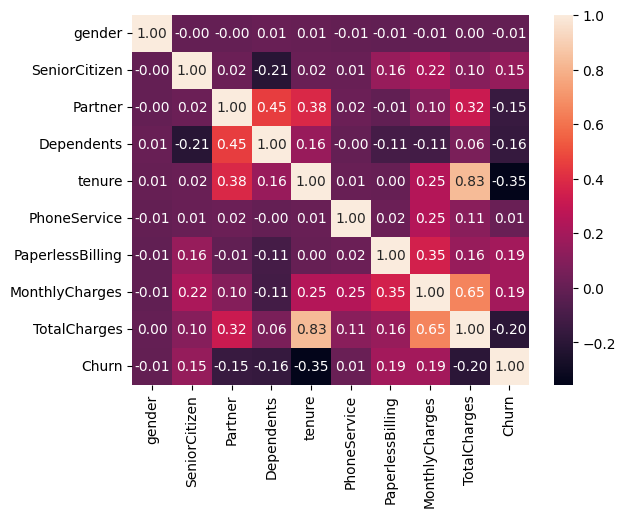

In [1267]:
# Visualization of correlation
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [1268]:
df_1 = df.copy()

In [1269]:
for i in cat.columns:
  te = TargetEncoder()
  df[i] = te.fit_transform(df[i], df['Churn'])

In [1270]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0.250000,0.189983,0.417787,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,1,0.452854,29.85,29.85,0
1,1,0,0,0,34,1,0.250812,0.189983,0.146402,0.399417,0.225393,0.416475,0.335351,0.337289,0.112772,0,0.192020,56.95,1889.50,0
2,1,0,0,0,2,1,0.250812,0.189983,0.146402,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,1,0.192020,53.85,108.15,1
3,1,0,0,0,45,0,0.250000,0.189983,0.146402,0.399417,0.225393,0.151961,0.335351,0.337289,0.112772,0,0.167315,42.30,1840.75,0
4,0,0,0,0,2,1,0.250812,0.418928,0.417787,0.399417,0.391403,0.416475,0.335351,0.337289,0.427097,1,0.452854,70.70,151.65,1


In [1271]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.70, random_state = 100)

In [1272]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1273]:
sc = ['tenure','MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract','PaymentMethod','MonthlyCharges', 'TotalCharges']

In [1274]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
train[sc] = scaler.fit_transform(train[sc])
test[sc] = scaler.transform(test[sc])

In [1275]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
879,1,0,0,0,0.450704,1,1.000000,0.335595,1.000000,0.434755,1.00000,1.000000,1.000000,1.000000,1.0,1,0.049227,0.362189,0.189979,0
5790,0,0,1,1,0.549296,0,0.000000,0.335595,1.000000,0.434755,1.00000,1.000000,0.868955,0.856379,1.0,1,1.000000,0.324378,0.232831,0
6498,0,0,0,0,0.000000,1,0.022267,1.000000,1.000000,0.434755,0.47641,1.000000,1.000000,1.000000,1.0,1,1.000000,0.637313,0.007322,1
880,1,0,0,0,0.126761,1,0.022267,1.000000,0.209815,0.434755,0.47641,0.226867,0.868955,0.856379,1.0,1,1.000000,0.913930,0.118216,1
2784,0,0,0,1,0.042254,1,0.022267,1.000000,1.000000,1.000000,0.47641,0.226867,0.868955,0.856379,1.0,1,0.049227,0.794527,0.043556,1


In [1276]:
X_train = train.drop(columns = 'Churn')
X_test = test.drop(columns = 'Churn')

y_train = train['Churn']
y_test = test['Churn']

In [1277]:
X_train.shape

(4922, 19)

In [1278]:
X_test.shape

(2110, 19)

## Class Balancing:

Class balancing is a crucial aspect of training machine learning models on datasets where the distribution of classes is not uniform. Imbalanced datasets can lead to models that are biased towards the majority class, resulting in poor performance on the minority class, which is often of more interest.

In [1279]:
from sklearn.linear_model import LogisticRegression
lr_weighted = LogisticRegression(class_weight='balanced')
lr_weighted.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [1280]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
print('Accuracy: ', accuracy_score(y_test, lr_weighted.predict(X_test)))
print('Reall: ', recall_score(y_test, lr_weighted.predict(X_test)))
print('Precision: ', precision_score(y_test, lr_weighted.predict(X_test)))
print('F1-score: ', f1_score(y_test, lr_weighted.predict(X_test)))
print('ROC-AUC: ', roc_auc_score(y_test, lr_weighted.predict(X_test)))

Accuracy:  0.7402843601895734
Reall:  0.7766323024054983
Precision:  0.5195402298850574
F1-score:  0.6225895316804407
ROC-AUC:  0.7515360464907072


In [1281]:
X_train.shape

(4922, 19)

In [1282]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [1283]:
selected_f = X_train.columns[rfe.support_]
selected_f

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [1284]:
X_train_rfe = X_train[selected_f]
X_test_rfe = X_test[selected_f]

In [1285]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_rfe, y_train)

LogisticRegression()

In [1286]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
print('Accuracy: ', accuracy_score(y_test, lr.predict(X_test_rfe)))
print('Reall: ', recall_score(y_test, lr.predict(X_test_rfe)))
print('Precision: ', precision_score(y_test, lr.predict(X_test_rfe)))
print('F1-score: ', f1_score(y_test, lr.predict(X_test_rfe)))
print('ROC-AUC: ', roc_auc_score(y_test, lr.predict(X_test_rfe)))

Accuracy:  0.7966824644549763
Reall:  0.5601374570446735
Precision:  0.6533066132264529
F1-score:  0.603145235892692
ROC-AUC:  0.7234587808783577


In [1287]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
logreg = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = logreg.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2012.7
Date:                Fri, 16 Feb 2024   Deviance:                       4025.4
Time:                        08:17:42   Pearson chi2:                 5.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2821
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9401      0.244  

In [1288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,features,VIF
9,StreamingTV,38.68
10,StreamingMovies,36.81
0,const,33.39
14,MonthlyCharges,15.14
15,TotalCharges,10.59
5,InternetService,7.68
2,tenure,6.94
7,OnlineBackup,3.03
8,TechSupport,2.49
11,Contract,2.43


In [1289]:
X_train_rfe.drop(columns = 'StreamingTV', inplace = True)
X_test_rfe.drop(columns = 'StreamingTV', inplace = True)

In [1290]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
logreg = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = logreg.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.0
Date:                Fri, 16 Feb 2024   Deviance:                       4028.0
Time:                        08:17:42   Pearson chi2:                 5.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2817
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9876      0.242  

In [1291]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,features,VIF
0,const,32.98
13,MonthlyCharges,14.80
14,TotalCharges,10.59
5,InternetService,7.61
2,tenure,6.94
9,StreamingMovies,6.11
7,OnlineBackup,2.97
8,TechSupport,2.48
10,Contract,2.43
6,OnlineSecurity,2.23


In [1292]:
X_train_rfe.drop(columns = 'MonthlyCharges', inplace = True)
X_test_rfe.drop(columns = 'MonthlyCharges', inplace = True)

In [1293]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,features,VIF
0,const,32.70
13,TotalCharges,7.37
2,tenure,6.17
9,StreamingMovies,4.94
5,InternetService,3.69
7,OnlineBackup,2.97
8,TechSupport,2.39
10,Contract,2.39
6,OnlineSecurity,2.23
4,MultipleLines,1.48


In [1294]:
X_train_rfe.drop(columns = 'TotalCharges', inplace = True)
X_test_rfe.drop(columns = 'TotalCharges', inplace = True)

In [1295]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending =False)
vif

,features,VIF
0,const,28.92
9,StreamingMovies,4.35
7,OnlineBackup,2.90
5,InternetService,2.88
2,tenure,2.42
10,Contract,2.39
8,TechSupport,2.30
6,OnlineSecurity,2.19
4,MultipleLines,1.43
3,PhoneService,1.33


In [1296]:
X_train_rfe.drop(columns = 'const', inplace = True)

In [1297]:
X_train_rfe.shape

(4922, 12)

In [1298]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Example features
all_features=df_1[X_train_rfe.columns]
categorical_features = ['SeniorCitizen', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',  'OnlineBackup', 'TechSupport', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['tenure']

for col in categorical_features:
    all_features[col] = all_features[col].astype('category')
    df_1[col] = df_1[col].astype('category')

numerical_transformer= MinMaxScaler()
categorical_transformer=TargetEncoder()
# Create the preprocessing pipeline for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the model
model = LogisticRegression(class_weight='balanced')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
from sklearn.model_selection import train_test_split
train_1, test_1 = train_test_split(df_1, train_size = 0.70, random_state = 100)
X_train_1 = train_1[X_train_rfe.columns]
X_test_1 = test_1[X_train_rfe.columns]

y_train_1 = train_1['Churn']
y_test_1 = test_1['Churn']
# Fit the pipeline on your training data
pipeline.fit(X_train_1, y_train_1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['tenure']),
                                                 ('cat', TargetEncoder(),
                                                  ['SeniorCitizen',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'TechSupport',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(class_weight='balanced'))])

In [1299]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
print('Accuracy: ', accuracy_score(y_test, pipeline.predict(X_test_rfe)))
print('Reall: ', recall_score(y_test, pipeline.predict(X_test_rfe)))
print('Precision: ', precision_score(y_test, pipeline.predict(X_test_rfe)))
print('F1-score: ', f1_score(y_test, pipeline.predict(X_test_rfe)))
print('ROC-AUC: ', roc_auc_score(y_test, pipeline.predict(X_test_rfe)))

Accuracy:  0.27582938388625594
Reall:  1.0
Precision:  0.27582938388625594
F1-score:  0.4323922734026746
ROC-AUC:  0.5


## Probability threshold Tuning

In logistic regression, the threshold probability is a critical value used to decide the class of an outcome based on the predicted probabilities. By default, this threshold is often set at 0.5 for binary classification problems, meaning if the predicted probability of the positive class is greater than or equal to 0.5, the outcome is classified as positive; otherwise, it's classified as negative. However, this default threshold may not always be optimal, especially in cases where the classes are imbalanced or when the costs of false positives and false negatives are significantly different.

In [1300]:
pipeline.predict_proba(X_test_1)[:,1]

array([0.73121108, 0.48840265, 0.0438992 , ..., 0.03377281, 0.78089204,
       0.02370321])

In [1301]:
from sklearn.metrics import f1_score
probabilities = pipeline.predict_proba(X_test_1)[:, 1]  # Get probabilities
best_threshold = 0.5
best_f1 = 0

for threshold in np.linspace(0, 1, num=100):
    predictions = (probabilities >= threshold).astype(int)
    f1 = f1_score(y_test, predictions)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Optimal Threshold: {np.round(best_threshold, 2)} with F1 Score: {np.round(best_f1, 2)}")


Optimal Threshold: 0.66 with F1 Score: 0.63


In [1302]:
'''
X_sample = pd.DataFrame([{
    'SeniorCitizen': 1,
    'tenure': 3,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'TechSupport': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Two year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic Check'
}])
'''
features = ['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',  'OnlineBackup', 'TechSupport', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
feature_vals = np.array([[1, 12, 1, 'No', 'DSL', 'No',  "No", "No", 'No','Month-to-month', 1, 'Electronic check']])
# creating the dataframe
X_sample = pd.DataFrame(data=feature_vals,
                        columns = features
                        )
for col in categorical_features:
  X_sample[col] = X_sample[col].astype('category')

print("Here is the sample customer data - ")
X_sample


Here is the sample customer data - 


,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,12,1,No,DSL,No,No,No,No,Month-to-month,1,Electronic check


In [1303]:
#Prediction logic
predicted_probabilities = pipeline.predict_proba(X_sample)

predicted_classes = (predicted_probabilities[:, 1] >= best_threshold).astype(int)

print("Customer Churn prediction: ", predicted_classes[0])

Customer Churn prediction:  1


In [1304]:
#Saving the model in pickle format
import pickle
pickle_out = open("telco_churn_prediction.pkl", mode="wb")
pickle.dump(pipeline, pickle_out)
pickle_out.close()

# Strategies to Reduce Churn

Predictive Analytics: Telecom companies use machine learning models to predict which customers are at risk of churning. By analyzing customer behavior, usage patterns, service quality metrics, and feedback, companies can identify at-risk customers and proactively address their concerns.

Personalized Offers and Services: **Tailoring offers and services to meet individual customer needs can enhance satisfaction(NPS)** and loyalty. This might include customized plans, loyalty rewards, or targeted discounts.

Quality of Service (QoS): Ensuring high-quality, reliable telecom services is fundamental. Investments in network infrastructure, technology upgrades, and service reliability can reduce churn caused by dissatisfaction with service quality.

Customer Engagement and Experience: Creating **positive customer experiences through regular engagement, value-added services, and understanding customer needs** can foster loyalty. Engaging customers through surveys, community forums, and social media can also provide valuable feedback for improvements.

Transparent Communication: Clear, **honest communication about pricing, policies, and any changes in service** helps build trust with customers. Transparency in dealing with problems and compensations can also mitigate dissatisfaction.

#Conclusion

Addressing churn in the telecom industry requires a multifaceted approach that combines predictive analytics, personalized customer engagement, exceptional service quality, and continuous improvement based on customer feedback. By implementing these strategies, telecom companies can not only reduce churn but also enhance customer loyalty and competitive advantage in a crowded market.  

In [1305]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, category-encoders, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
